# Equivalence of Distributions - Adding Random Values of Distributions
This notebook demonstrates the following:
1. Sum of 'N' I.I.D Standard Normal Variables  == Normal Distribution
    1. $\forall (Z_1,Z_2...Z_n) $ ~ $N(\mu=0,\sigma^2=1) \implies$ $Y=(Z_1+Z_2+...+Z_n) $ ~ $  N(\mu=0,Var =n\times \sigma^2)$
1. Sum of Square of Standard Normal Variables == _Chi-square Distribution_
    1. $\forall (Z_1,Z_2...Z_n) $ ~ $N(\mu=0,\sigma^2=1) \implies$ $Y=(Z^2_1+Z^2_2+...+Z^2_n) $ ~ $  \chi^2_{df=n}$
1. The divison of two independent Chi-squared distrbutions  == _F Distribution_
   1. If  $ X_1 $ ~ $ \chi^2_{df_1}$ and  $ X_2 = \chi^2_{df_2}  \implies$ $ Y = \frac{(X_1/df_1)}{(X_2/df_2)} $ ~ $ F_{df_1, df_2} $
1. The division of a Standard Normal with a square root of Chi-square == _Student's t Distribution_
    1. If  $ Z $ ~ $ N(\mu=0,\sigma^2=1)$ and $ X $ ~ $ \chi^2_{df_1}$ then $ Y = \frac{Z}{\sqrt(X/df_1)} $ ~ $ t(df_1)$


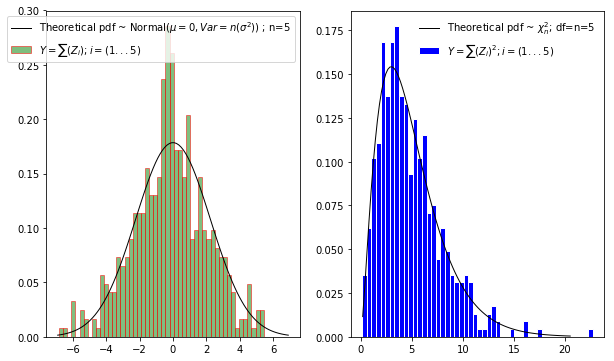

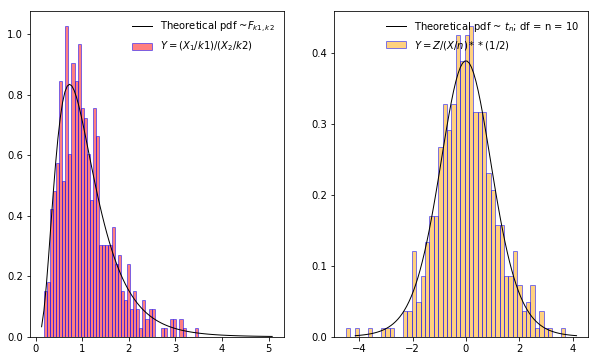

In [2]:
### TEST for Push to GitHub ###
import numpy as np
import scipy.stats as spstats
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

ss = 500 # sample size of each independent distribution
num_iid = 5 # Number of random independent variables

##############  PART 1 #################

##### Demonstrate relation b/w Sum of Normal and Sum of Square of Standard Normal Distribution. #####

std_norm = spstats.norm(0,1) #  Std normal
th_chi2 = spstats.chi2(num_iid) # Theoretical Chi-Square with df = num_iid
th_norm = spstats.norm(0,num_iid**(0.5)) # Theortical Normal with Mean = 0 and Variance = N**(0.5)

i = 0
Y_1 = 0
Y_2 = 0

for i in range(num_iid):
    i = i + 1
   # print("obs{}".format(x))
    obs_i = std_norm.rvs(ss)
    Y_1 = Y_1 + obs_i
    Y_2 = Y_2 + (obs_i)**2


th_norm_grid = np.linspace(th_norm.ppf(0.001),th_norm.ppf(0.999), 100) # Prepare the x-axis values as percent point values (percentiles)
th_chi2_grid = np.linspace(th_chi2.ppf(0.001),th_chi2.ppf(0.999), 100) # Prepare the x-axis values as percent point values (percentiles)

fig, ax = plt.subplots(1,2)

ax[0].hist(Y_1, bins=50, density=True, alpha=0.5, label ='$Y = \sum (Z_i) ; i = (1...{})$'.format(num_iid), color='green', edgecolor='red')
ax[0].plot(th_norm_grid, th_norm.pdf(th_norm_grid), 'k-', lw=1, label ='Theoretical pdf ~ Normal$(\mu=0,Var=n(\sigma^2))$ ; n={}'.format(num_iid))
ax[0].legend(loc='best', frameon=True)

ax[1].hist(Y_2, bins=50, density=True, label ='$Y = \sum (Z_i)^2 ; i=(1...{})$'.format(num_iid), color='blue', edgecolor='white')
ax[1].plot(th_chi2_grid, th_chi2.pdf(th_chi2_grid), 'k-', lw=1, label ='Theoretical pdf ~ $\chi^2_n $; df=n={}'.format(num_iid))
ax[1].legend(loc='best', frameon=False)

plt.show()
###############################


##############  PART 2 #################
##### Demonstrate relation b/w two Chi2 == F Distribution. #####
df1 = 10
df2 = 20
# Theoretical Distributions for comparison #
th_chi2_1 = spstats.chi2(df1)
th_chi2_2 = spstats.chi2(df2)
th_f = spstats.f(df1,df2)
#####

X_1 = th_chi2_1.rvs(ss)
X_2 = th_chi2_2.rvs(ss)
Y_3 = (X_1/df1) / (X_2/df2)

th_f_grid = np.linspace(th_f.ppf(0.001),th_f.ppf(0.999), 100) # Prepare the x-axis values as percent point values (percentiles)

fig2, ax2 = plt.subplots(1,2)
ax2[0].hist(Y_3, bins=50, density=True, alpha=0.5, label ='$ Y = (X_1/k1)/(X_2/k2) $',color='red', edgecolor='blue')
ax2[0].plot(th_f_grid, th_f.pdf(th_f_grid), 'k-', lw=1, label ='Theoretical pdf ~$ F_{k1,k2}$')
ax2[0].legend(loc='best', frameon=False)

##### Demonstrate relation b/w Std. Normal (Z) and Chi-square == Student's t-Distribution. #####
# Theoretical Distributions for comparison #
th_t = spstats.t(df1)
#####

new_Z = std_norm.rvs(ss)
Y_4 = (new_Z) / (X_1/df1)**(0.5)

th_t_grid = np.linspace(th_t.ppf(0.001),th_t.ppf(0.999), 100) # Prepare the x-axis values as percent point values (percentiles)

ax2[1].hist(Y_4, bins=50, density=True, alpha=0.5, label ='$Y = Z/(X/n)**(1/2)$',color='orange', edgecolor='blue')
ax2[1].plot(th_t_grid, th_t.pdf(th_t_grid), 'k-', lw=1, label ='Theoretical pdf ~ $ t_n $; df = n = {}'.format(df1))
ax2[1].legend(loc='best', frameon=False)

plt.show()
###############################

